# Zomato Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv',encoding='latin')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Understanding the data

In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.duplicated().sum()

0

#### Conclusion:
There are neither null values nor duplicated values in the dataset.

# Data Preparation

#### Droping unwanted columns

In [9]:
df.drop(columns=['Restaurant ID','Address','Locality Verbose','Longitude','Latitude'], inplace=True)

In [10]:
df['Average Cost per person'] = df['Average Cost for two']/2
df.drop(columns='Average Cost for two',inplace=True)

#### Adding country name using country code

In [11]:
country_code = pd.read_excel('Country-Code.xlsx')

In [12]:
df = pd.merge(df,country_code).drop(columns=['Country Code'])

#### Encoding categorical columns

In [13]:
df['Has Table booking']=df['Has Table booking'].map({'Yes':1,'No':0})
df['Has Online delivery']=df['Has Online delivery'].map({'Yes':1,'No':0})
df['Is delivering now']=df['Is delivering now'].map({'Yes':1,'No':0})
df['Switch to order menu']=df['Switch to order menu'].map({'Yes':1,'No':0})

In [14]:
print(df['Switch to order menu'].value_counts())
print(df['Has Online delivery'].value_counts())
print(df['Has Table booking'].value_counts())
print(df['Is delivering now'].value_counts())

Switch to order menu
0    9551
Name: count, dtype: int64
Has Online delivery
0    7100
1    2451
Name: count, dtype: int64
Has Table booking
0    8393
1    1158
Name: count, dtype: int64
Is delivering now
0    9517
1      34
Name: count, dtype: int64


In [15]:
df.drop(columns=['Switch to order menu'],inplace=True)

# Analysis

### Top 3 Countries (as per the No. of Outlets)

In [16]:
df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [17]:
df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [18]:
print(df.Country.value_counts().index)
print(df.Country.value_counts().values)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')
[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


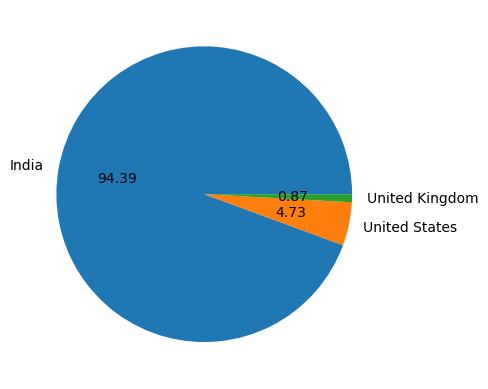

In [19]:
plt.pie(x=df.Country.value_counts().values[:3],labels=df.Country.value_counts().index[:3],autopct='%.2f')
plt.show()

Since, India has much more outlets of Zomato in comparision to other countries we will proceed our further analysis only on Indian Outlets.

## Analysis on Indian Outlets 

In [20]:
df = df[df['Country']=='India'].drop(['Country'],axis=1).reset_index(drop=True)

In [21]:
df.head()

,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost per person
0,Jahanpanah,Agra,Agra Cantt,"North Indian, Mughlai",Indian Rupees(Rs.),0,0,0,3,3.9,Yellow,Good,140,425.0
1,Rangrezz Restaurant,Agra,Agra Cantt,"North Indian, Mughlai",Indian Rupees(Rs.),0,0,0,2,3.5,Yellow,Good,71,350.0
2,Time2Eat - Mama Chicken,Agra,Agra Cantt,North Indian,Indian Rupees(Rs.),0,0,0,2,3.6,Yellow,Good,94,250.0
3,Chokho Jeeman Marwari Jain Bhojanalya,Agra,Civil Lines,Rajasthani,Indian Rupees(Rs.),0,0,0,2,4.0,Green,Very Good,87,200.0
4,Pinch Of Spice,Agra,Civil Lines,"North Indian, Chinese, Mughlai",Indian Rupees(Rs.),0,0,0,3,4.2,Green,Very Good,177,500.0


In [22]:
df.shape

(8652, 14)

In [23]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [24]:
df.drop(['Currency','Price range'],axis=1,inplace=True)

In [25]:
df.nunique()

Restaurant Name            6604
City                         43
Locality                    784
Cuisines                   1392
Has Table booking             2
Has Online delivery           2
Is delivering now             2
Aggregate rating             33
Rating color                  6
Rating text                   6
Votes                       871
Average Cost per person      79
dtype: int64

## 1. Top Cities :
### a) As per the No. of Outlets

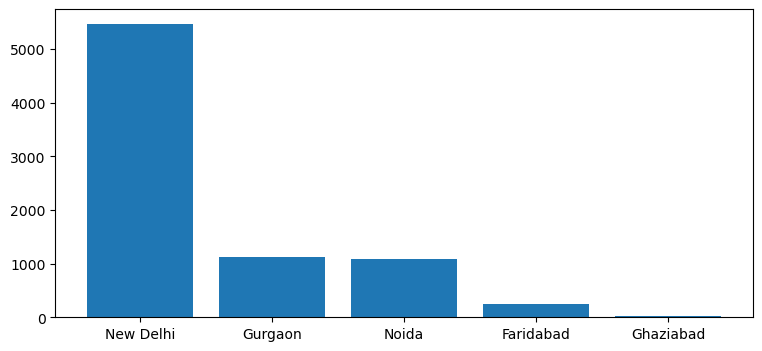

In [26]:
plt.figure(figsize=(9,4))
plt.bar(x=df.City.value_counts().index[:5],height=df.City.value_counts().values[:5])
plt.show()

**Top 5 Cities on the basis of number of outlets:**
1. New Delhi 
2. Gurgaon
3. Noida
4. Faridabad
5. Ghaziabad

### b) As per Aggregate rating 

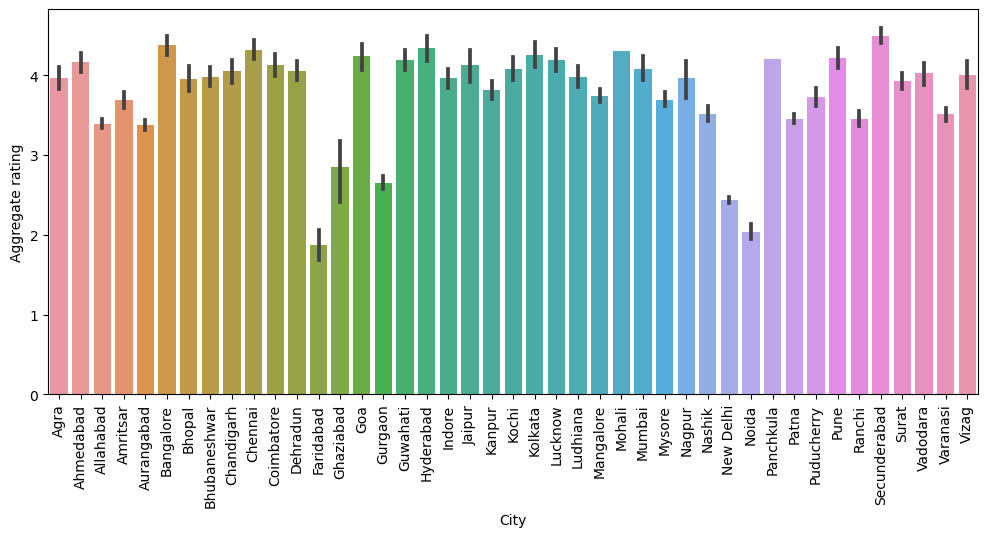

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['City'], y=df['Aggregate rating'])
plt.xticks(rotation='vertical')
plt.show()

As Mohali and Panchkula have only one vote for rating, considering it would not lead to accurate analysis. Therefore we will delete it from top ranks.

In [28]:
ratings = df[['City','Aggregate rating']].groupby(by='City').mean().sort_values(by='Aggregate rating',ascending=False).reset_index().drop([4,8])

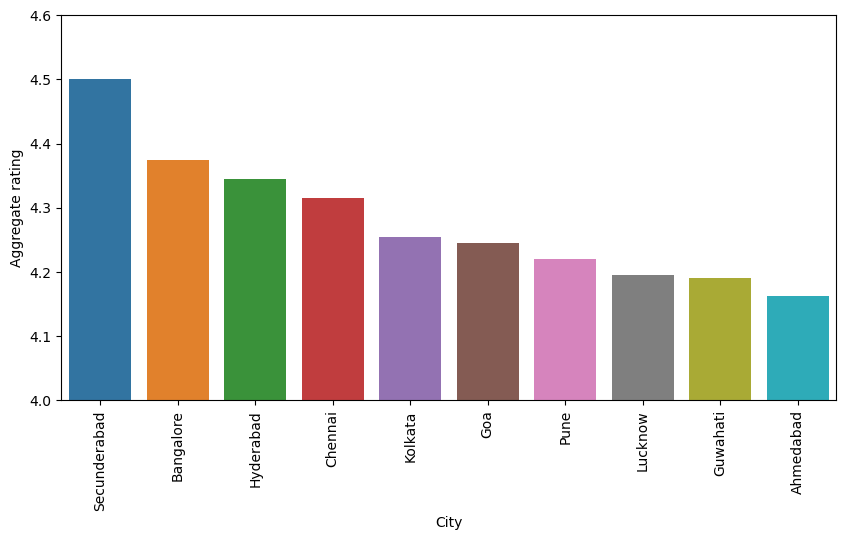

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=ratings['City'][:10],y=ratings['Aggregate rating'][:10])
plt.ylim(4,4.6)
plt.xticks(rotation='vertical')
plt.show()

**Top 10 Cities on the basis of aggregate rating:**

1. Secunderabad
2. Bangalore
3. Hyderabad
4. Chennai
5. Kolkata
6. Goa
7. Pune
8. Lucknow
9. Guwahati
10. Ahemdabad

### c) As per the Average Cost per Person 

In [30]:
average_cost = df[['City','Average Cost per person']].groupby(by='City').mean().sort_values('Average Cost per person',ascending=False).reset_index().drop([0])

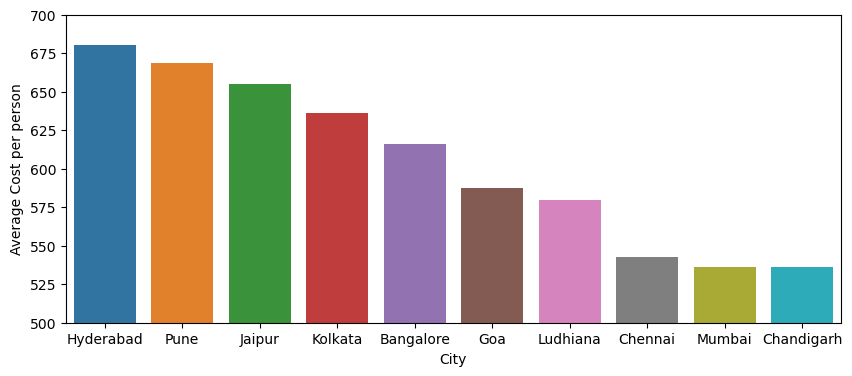

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x=average_cost['City'][:10],y=average_cost['Average Cost per person'][:10])
plt.ylim(500,700)
plt.show()

**Top 10 Cities on the basis of average cost per person:**

1. Hyderabad
2. Pune
3. Jaipur
4. Kolkata
5. Bangalore
6. Goa
7. Ludhiana
8. Chennai
9. Mumbai
10. Chandigarh

## 2. Top Cuisines :

In [32]:
cuisines = []
for cuisine in df['Cuisines']:
    cuisine = cuisine.replace(' ','')
    cuisines.extend(cuisine.split(','))
    
cuisines_df = pd.DataFrame({'Cuisines':cuisines}).groupby('Cuisines').size().reset_index().sort_values(0,ascending=False)

In [33]:
cuisines_df.columns = ['Cuisines','Count']

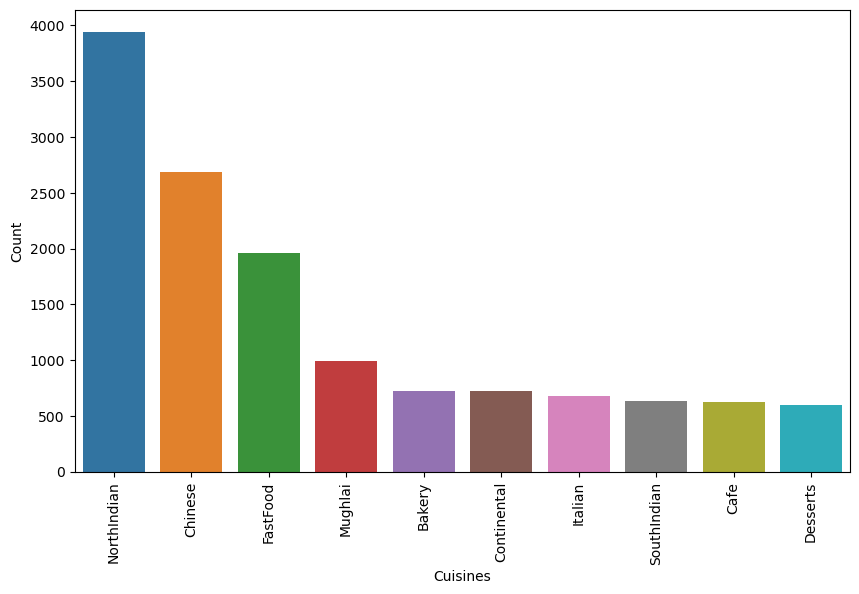

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=cuisines_df['Cuisines'][:10],y=cuisines_df['Count'][:10])
plt.xticks(rotation='vertical')
plt.show()

**Top 10 Cuisines available on Zomato across India:**

1. North Indian
2. Chinese
3. Fast Food
4. Mughlai
5. Bakery
6. Continental
7. Italian
8. South Indian
9. Cafe
10. Desserts

## Summary of Analysis :

1. There is no null values in the data.
2. Zomato has its maximum outlets in India.
3. New Delhi has maximum restaurants for zomato.
4. Secunderabad, Bangalore and Hyderabad have most highly rated restaurants.
5. Hyderabad, Pune and Jaipur are most expensive cities.
6. North Indian and Chinese are the Top Cuisines on Zomato across India.